In [1]:
from math import log
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as datasets

In [2]:
device = torch.device("cuda:0" if(torch.cuda.is_available()) else "cpu")
print(device)
cuda = torch.cuda.is_available()

cuda:0


In [3]:
params = {
    'batch_size': 128, #size of the batches
    'image_size': 32, #size of each image dimension
    'lr': 0.0001, #adam: learning rate
    'b1': 0.5, #adam: decay of first order momentum of gradient
    'b2': 0.999, #adam: decay of first order momentum of gradient
}

In [4]:
transform = transforms.Compose([
#     transforms.Grayscale(num_output_channels=1),
    transforms.Resize(params['image_size']),
    transforms.ToTensor(),
#     transforms.Lambda(lambda x: x.repeat(3,1,1)),
    transforms.Normalize(mean=(0.5,), std=(0.5,))
])

In [5]:
trainset = datasets.MNIST(root='./data', train='train',
                       download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=params['batch_size'], pin_memory=True,
                                          shuffle=True)
testset = datasets.MNIST(root='./data', train=False,
                      download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=params['batch_size'], pin_memory=True,
                                         shuffle=False)

classes = ('0', '1', '2', '3', '4', '5', '6', '7', '8', '9')

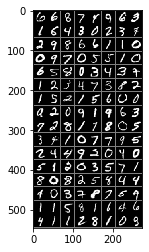

    6     6     8     7


In [7]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [20]:
# loss fucntion of MINEE classification
# loss = E(f(x*,x,y)) - E[ln(1/|y|) * sum_y(e^f(x*,x,y))]

FloatTensor = torch.cuda.FloatTensor if cuda else torch.FloatTensor

class_vectors = [] * 10
for i in range(len(classes)):
    class_vectors.append(np.array([]))

def loss_func(x_output, y):
    mean_fXY = x_output.mean()
    mean_efXY
    print(x_output[0])
    print(y[0])
    loss = mean_f - mean_class
    return 0

In [13]:
def weights_init(m):
    """
    Initialise weights of the model.
    """
    if(type(m) == nn.ConvTranspose2d or type(m) == nn.Conv2d):
        nn.init.normal_(m.weight.data, 0.0, 0.02)
    elif(type(m) == nn.BatchNorm2d):
        nn.init.normal_(m.weight.data, 1.0, 0.02)
        nn.init.constant_(m.bias.data, 0)

In [14]:
# Basic architecture implemented in the PyTorch tutorial
# https://pytorch.org/tutorials/beginner/blitz/neural_networks_tutorial.html
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # 1 input image channel, 6 output channels, 3x3 square convolution
        # kernel
        self.conv1 = nn.Conv2d(1, 6, kernel_size=[3,3], padding=1, stride=1)
        self.conv2 = nn.Conv2d(6, 16, kernel_size=[3,3], padding=1, stride=1)
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(16 * 8 * 8, 120)  # 6*6 from image dimension
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        self.max_pooling = nn.MaxPool2d(kernel_size=(2,2), stride=2)

    def forward(self, x):
        # Max pooling over a (2, 2) window
        x = self.max_pooling(F.relu(self.conv1(x)))
        # If the size is a square you can only specify a single number
        x = self.max_pooling(F.relu(self.conv2(x)))
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features

In [15]:
net = Net().cuda() if torch.cuda.is_available() else Net()
net.apply(weights_init)
print("Neural Network is successfully defined in device %s." % device)

Neural Network is successfully defined in device cuda:0.


In [16]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=params['lr'], betas=(params['b1'], params['b2']))

In [23]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
#         print("inputs shape", inputs.shape)
#         print("label shape", labels.shape)
        if torch.cuda.is_available():
            inputs = inputs.cuda()
            labels = labels.cuda()

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs).cuda()
#         print(outputs.size())
#         loss = criterion(outputs, labels)
        loss = loss_func(outputs, labels)
        loss.backward(retain_graph=True) # HIGH Memory Usage
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 20 == 19:    # print every 200 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 200))
            running_loss = 0.0

print('Finished Training')

tensor([ 0.0642,  0.1040, -0.0803,  0.0568,  0.0969,  0.0818,  0.0578, -0.0397,
         0.0471, -0.0650], device='cuda:0', grad_fn=<SelectBackward>)
tensor(4, device='cuda:0')


NameError: name 'mean_f' is not defined

In [ ]:
a = torch.randn(20,10).cuda()
print(a.mean())
print(torch.sum(a,0))